# Assignment 3
&copy; 2023, Scripnic Dinu, all rights reserved

## 3.1 Mobile phone picture

In [15]:
# all required libraries
from PIL import Image
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator


### 3.1.1 
* Take a picture with your smartphone. The picture must contain a piece of paper with your name on it and 
some type of background (walls, floor, window, etc.).
* Resize it to a manageable size (e.g., 256x256) either with R or Py

Original image size:  (256, 256)


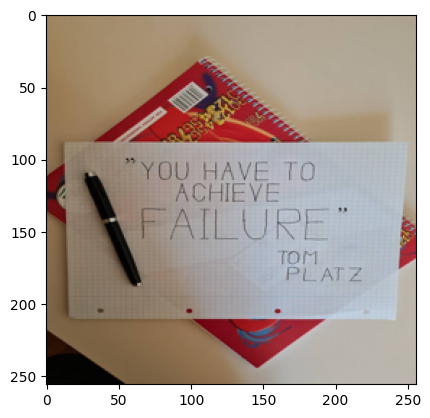

[[159 127  84]
 [159 127  84]
 [160 128  86]
 ...
 [185 178 170]
 [184 177 169]
 [183 176 168]]


In [16]:
# i choose to use pillow because it is easier and more efficient than opencv
# opencv is more for computer vision and other more complex tasks
# open and resize the image
img = Image.open("img.jpg")
img = img.resize((256, 256))
print("Original image size: ", img.size)
plt.imshow(img)
plt.show()
# now in order to use the image we have to convert it to a numpy array
img_array = np.array(img)
pixels = img_array.reshape((-1, 3))
print(pixels)

### 3.1.2
* Reduce the number of RGB colors in the image by using the k-means algorithm.

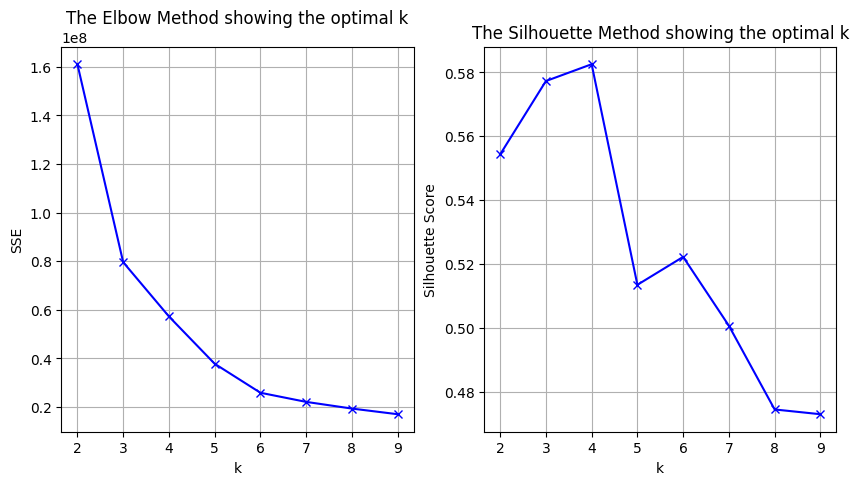

In [17]:
# now we have to use the kmeans algorithm to cluster the pixels
k_list = np.arange(2, 10, 1)
sse = list()
silhouette_scores = list()
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(pixels)
    sse.append(kmeans.inertia_)
    sil_score = silhouette_score(pixels, kmeans.labels_)
    silhouette_scores.append(sil_score)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(k_list, sse, "bx-")
axs[0].set_xlabel("k")
axs[0].set_ylabel("SSE")
axs[0].set_title("The Elbow Method showing the optimal k")
axs[1].plot(k_list, silhouette_scores, "bx-")
axs[1].set_xlabel("k")
axs[1].set_ylabel("Silhouette Score")
axs[1].set_title("The Silhouette Method showing the optimal k")
axs[0].grid()
axs[1].grid()
axs[0].set_xticks(k_list)
axs[1].set_xticks(k_list)
plt.show()

#### Conclusion
* Based on the results of the WSS plot evaluated using the Elbow method, the best K is 3.
* Also the Silhouette plot shows that the best K is 4.
### 3.1.3 Generate a new image with the reduced number of colors (Result from 3.1.2 Elbow method)

old image


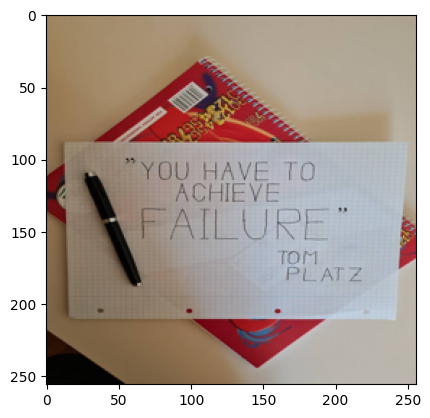

new image with k = 3


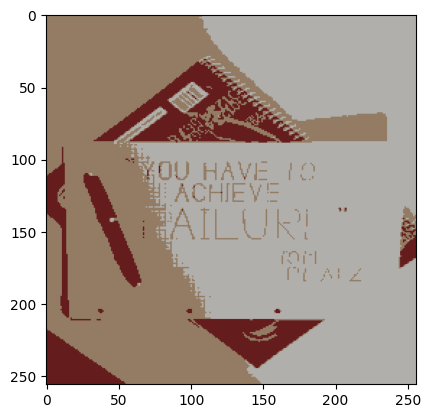

In [18]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(pixels)
labels = kmeans.labels_
labels = labels.reshape((256, 256))
new_pixels = kmeans.cluster_centers_[labels]
new_img_3 = Image.fromarray(new_pixels.astype(np.uint8), mode="RGB")
# show the old image
plt.imshow(img)
print("old image")
plt.show()
# show the new image
plt.imshow(new_img_3)
print("new image with k = 3")
plt.show()

#### Conclusion
* I consider the result to be fine, but not perfect. The colors are not as sharp as they should be, but the image is still recognizable.
* Important to note that T, F, E is not distinguishable from the background. More than that, some letters are a bit broken. Also the notebook's color is dark something, not red as in the original image.
### 3.1.4 Generation of a new image with the reduced number of colors (Result from 3.1.2 Silhouette method)

Original image


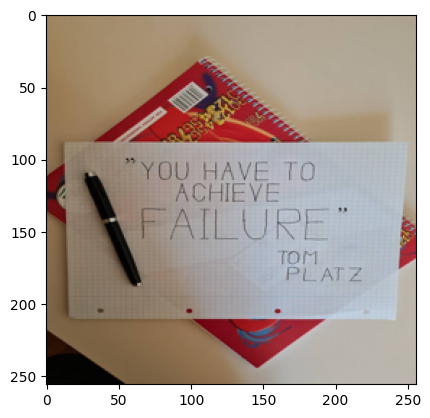

New image with k=4


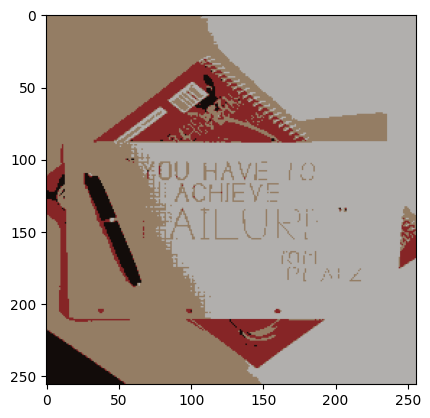

In [29]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(pixels)
labels = kmeans.labels_
labels = labels.reshape((256, 256))
new_pixels = kmeans.cluster_centers_[labels]
new_img_4 = Image.fromarray(new_pixels.astype(np.uint8), mode="RGB")
# show the old image
plt.imshow(img)
print("Original image")
plt.show()
# show the new image
plt.imshow(new_img_4)
print("New image with k=4")
plt.show()

#### Conclusion
* Personally I dont see any major difference between k=3 and k=4. The image is still recognizable, but the colors are not as sharp as they should be.
* Important to note that T, F, E is not distinguishable from the background. More than that, some letters are a bit broken. But the notebook's color is better than in the previous image.

### 3.1.5 Generation of a new image with the reduced number of colors (Result from my personal choice)

The original image


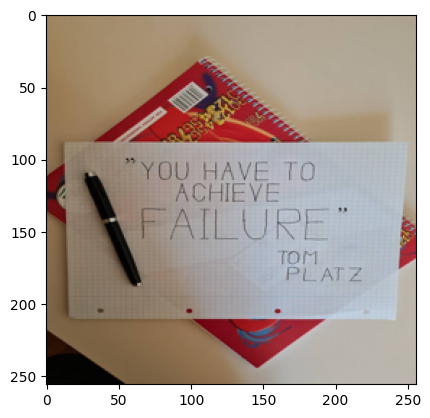

The new image with k = 5


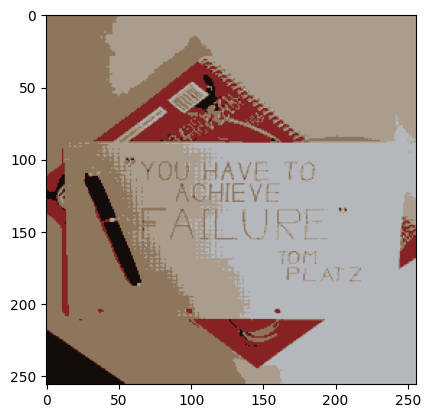

The new image with k = 6


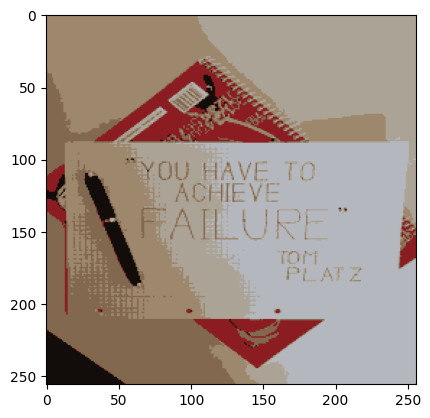

In [30]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(pixels)
labels = kmeans.labels_
labels = labels.reshape((256, 256))
new_pixels = kmeans.cluster_centers_[labels]
new_img_5 = Image.fromarray(new_pixels.astype(np.uint8), mode="RGB")
# show the old image
plt.imshow(img)
print("The original image")
plt.show()
# show the new image
plt.imshow(new_img_5)
print("The new image with k = 5")
plt.show()
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(pixels)
labels = kmeans.labels_
labels = labels.reshape((256, 256))
new_pixels = kmeans.cluster_centers_[labels]
new_img_6 = Image.fromarray(new_pixels.astype(np.uint8), mode="RGB")
# show the new image
plt.imshow(new_img_6)
print("The new image with k = 6")
plt.show()


#### Conclusion
* Further increase of K would give a very limited improvement that would not be worth the time spent.
* From all the experiments, form my point of view the best k = 6 . The image is recognizable and the colors are good.
* K=5 is also a good value for this image. The colors were quite good, but the image was not as recognizable as the one from k=6.

### 3.1.5 Final conclusion
* The best value for K is 6. The image is recognizable and the colors are good.
* The result from elbow was relatively good as well, k=3 is the second best value for this image. The colors were quite good, but the image was not as recognizable as the one from k=6.
* The result from silhouette was not much better than the one from elbow. The best value for K is 4. There were little differences between k=3 and k=4. Only major difference was the color of the notebook. The color was better in k=4 than in k=3.
* Further increase of K(over 6) would give a very limited improvement that would not be worth the time spent.

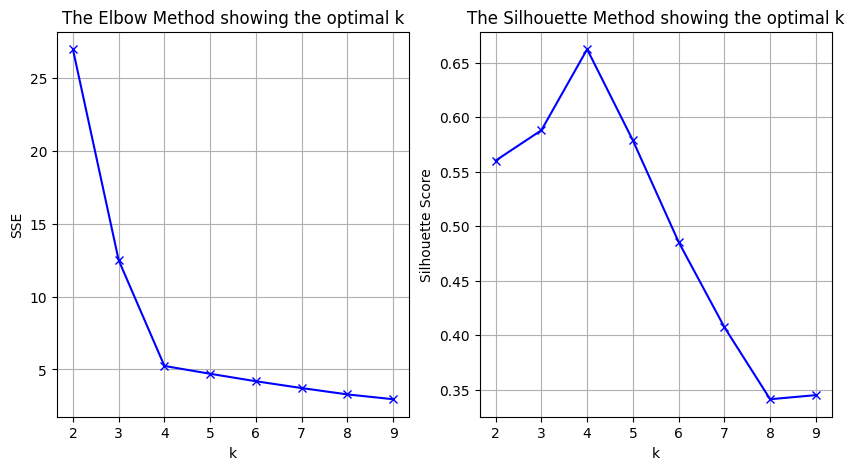

Original image


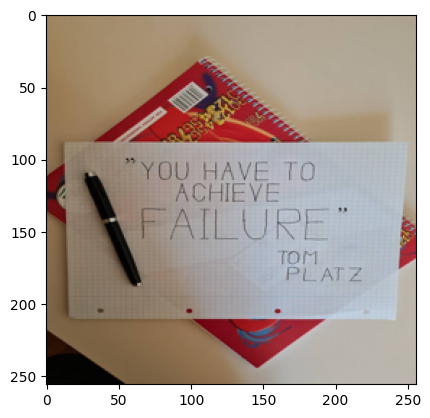

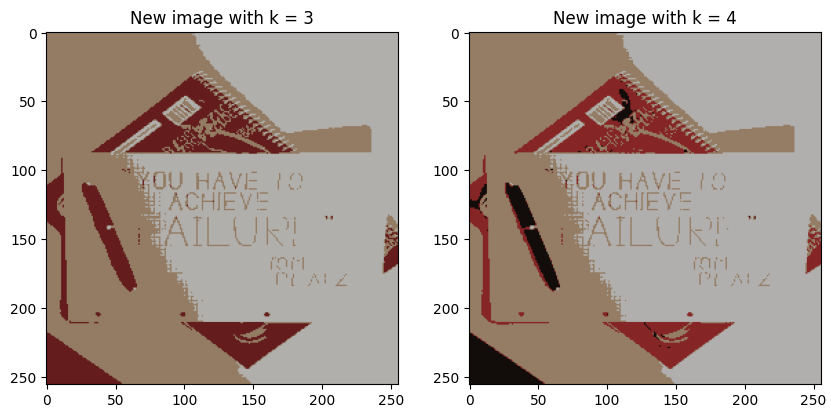

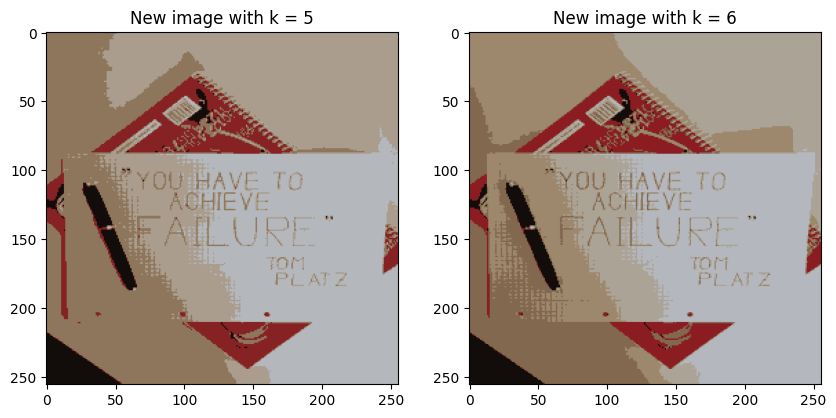

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(k_list, sse, "bx-")
axs[0].set_xlabel("k")
axs[0].set_ylabel("SSE")
axs[0].set_title("The Elbow Method showing the optimal k")
axs[1].plot(k_list, silhouette_scores, "bx-")
axs[1].set_xlabel("k")
axs[1].set_ylabel("Silhouette Score")
axs[1].set_title("The Silhouette Method showing the optimal k")
axs[0].grid()
axs[1].grid()
axs[0].set_xticks(k_list)
axs[1].set_xticks(k_list)
plt.show()
print("Original image")
plt.imshow(img)
plt.show()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(new_img_3)
axs[0].set_title("New image with k = 3")
axs[1].imshow(new_img_4)
axs[1].set_title("New image with k = 4")
plt.show()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(new_img_5)
axs[0].set_title("New image with k = 5")
axs[1].imshow(new_img_6)
axs[1].set_title("New image with k = 6")
plt.show()


### 3.1.6 Extra notes regarding the influence of colors on the K
* More colors in the image most of the times leads to a more continuous/less sharp change in WSS graph. This leads to a more difficult decision on the best K value, because the elbow is not as clear.
* On my exeriment with M&M's image, the WSS graph was very continuous, and the elbow was not clear at all.
* Also it leads to a higher required K value, because the colors are more different.
* In such cases, the Silhouette plot is more useful.
* Silhouette plot is VERY SLOW.


## 3.2 Drilling Machine
### 3.2.1 Initial data exploration

Data description:
                x           y
count  400.000000  400.000000
mean     0.415825    0.459285
std      0.248447    0.307058
min     -0.049693   -0.059671
25%      0.191769    0.186190
50%      0.406840    0.402992
75%      0.650679    0.732641
max      0.885153    1.063935
Null values:
x    0
y    0
dtype: int64
The drilling data Scatter plot


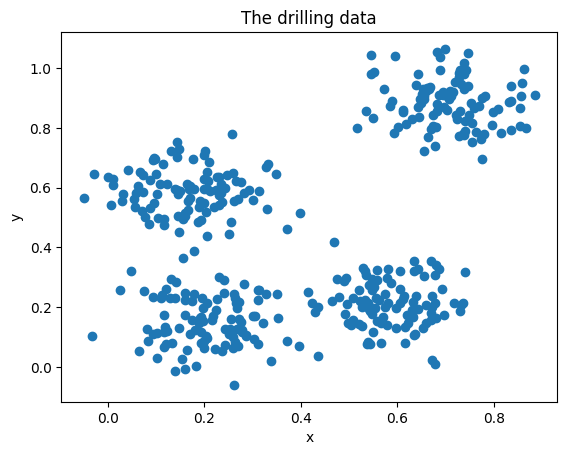

The drilling data boxplot


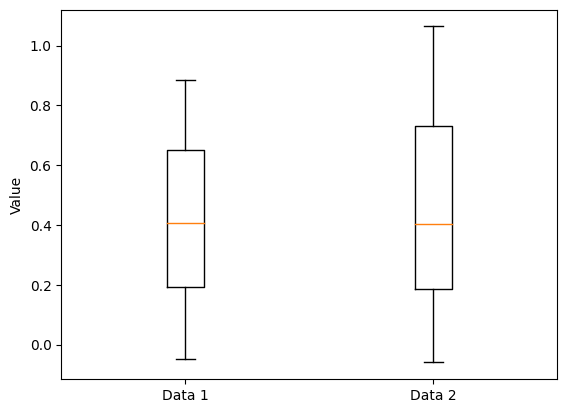

In [22]:
df = pd.read_csv("drilling.csv")
print('Data description:')
print(df.describe())
# print if there are any null values
print('Null values:')
print(df.isnull().sum())
# scatter plot to see the data and understand if it is clustered
plt.scatter(df["x"], df["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("The drilling data")
print("The drilling data Scatter plot")
plt.show()
# boxplot to see if there are any outliers
fig, ax = plt.subplots()
ax.boxplot(df)
ax.set_xticklabels(['Data 1', 'Data 2'])
ax.set_ylabel('Value')
print("The drilling data boxplot")
plt.show()

#### Data analysis
* Data contains 2 columns, x and y and 400 observations.
* The data on x varies from -0.05 to 0.88, while the data on y varies from -0.06 to 1.05.
* There are no missing values.
* Data does not contain any outliers.
* Based on the plot we can see that the data is very clustered, so we can use clustering algorithms.


### 3.2.2 K-means clustering
* Visually, the best K is 4.
* We will run a loop to find the best K value.
* Afterwards we will plot the WSS and analyze the results with the Elbow method.
* Final step would be to cluster the data and plot the results.

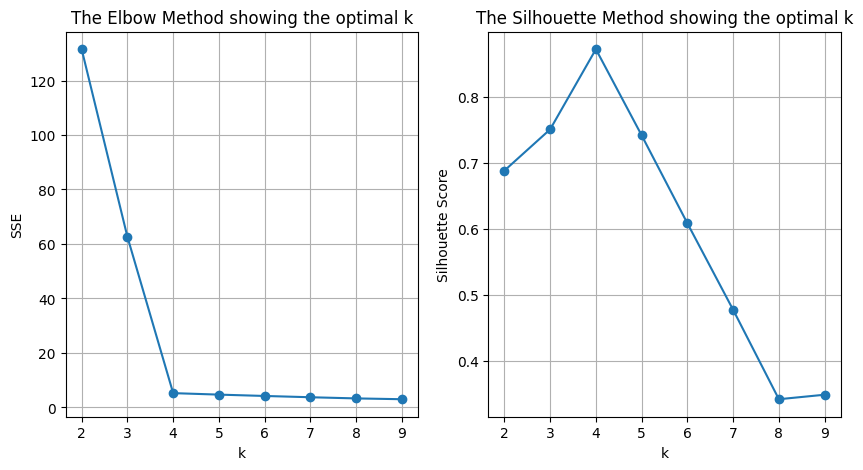

In [37]:
k_list = np.arange(2, 10, 1)
sse = list()
silhouette_scores = list()
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df)
    sse.append(kmeans.inertia_)
    sil_score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(sil_score)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(k_list, sse, marker="o")
axs[0].set_xlabel("k")
axs[0].set_ylabel("SSE")
axs[0].set_title("The Elbow Method showing the optimal k")
axs[1].plot(k_list, silhouette_scores, marker="o")
axs[1].set_xlabel("k")
axs[1].set_ylabel("Silhouette Score")
axs[1].set_title("The Silhouette Method showing the optimal k")
axs[0].grid()
axs[1].grid()
axs[0].set_xticks(k_list)
axs[1].set_xticks(k_list)
plt.show()

#### Conclusion
* Based on the results of the WSS plot evaluated using the Elbow method, the best K is 4.
* Also the Silhouette plot shows that the best K is 4.
* WSS plot and Silhouette proves my initial assumption that the best K is 4.

          x         y  KM_Cluster
0  0.311910  0.223846           1
1  0.611944  0.859759           2
2  0.566906  0.147251           0
3  0.178646  0.387353           3
4  0.241519  0.247069           1
5  0.683198  0.879005           2
6  0.732084  0.208386           0
7  0.156949  0.495125           3
8  0.218294  0.171284           1
9  0.780914  0.780394           2


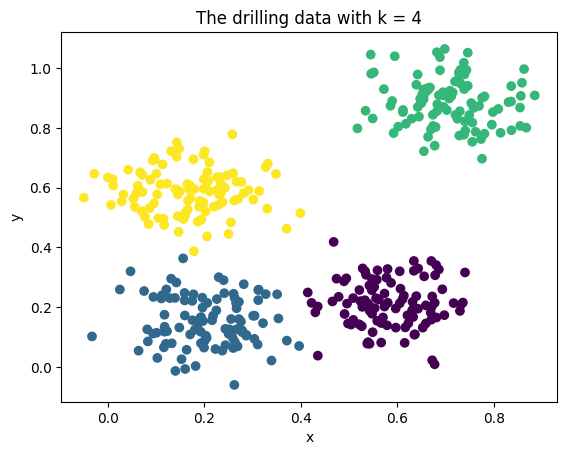

In [34]:
best_k = 4
best_km = KMeans(n_clusters=best_k, random_state=42, n_init=10, max_iter=500).fit(df)
cluster = best_km.predict(df)
df['KM_Cluster'] = cluster
print(df.head(10))
# Plot all the data and color it according to the cluster
plt.scatter(df["x"], df["y"], c=df["KM_Cluster"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("The drilling data with k = 4")
plt.show()

#### Conclusion
* We can see that K = 4 is for sure the best value for this data.
* The plot shows a very clear difference between the clusters.

### 3.2.3 Hierarchical clustering

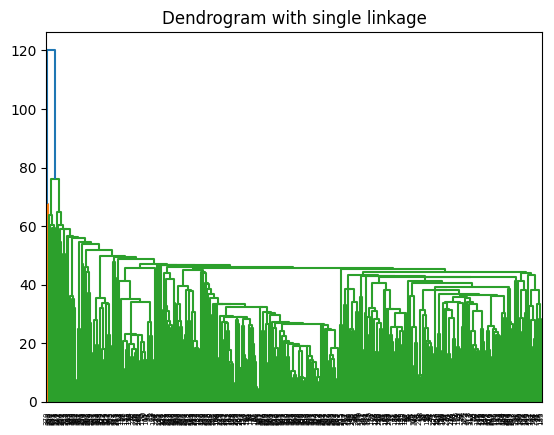

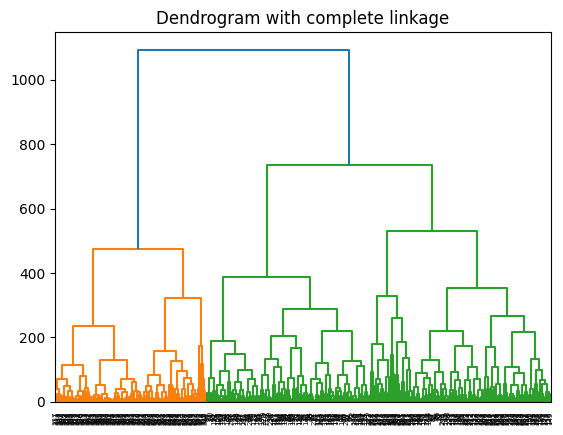

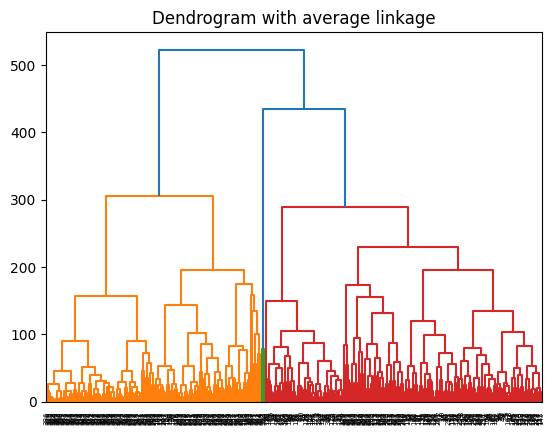

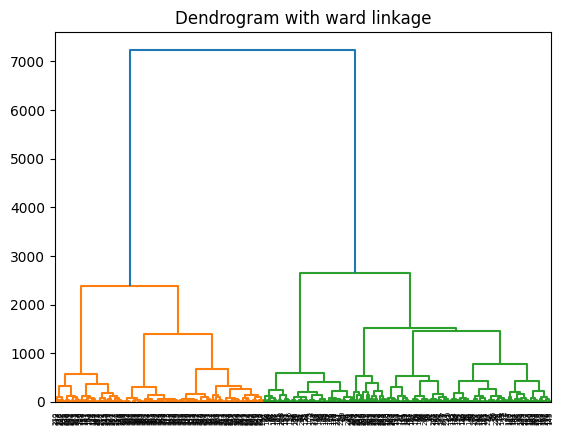

In [25]:
linkage_methods = ['single', 'complete', 'average', 'ward']
for method in linkage_methods:
    model = AgglomerativeClustering(n_clusters=None, linkage=method, distance_threshold=0)
    model.fit(df)
    Z = linkage(model.children_, method=method)
    fig, ax = plt.subplots()
    dendrogram(Z)
    ax.set_title(f'Dendrogram with {method} linkage')
    plt.show()

### 3.2.4 DBSCAN clustering

In [ ]:
...

### 3.2.5 HDBSCAN clustering

In [ ]:
...

### 3.2.6 Optics clustering

In [ ]:
...